Check Python version

In [127]:
!python --version

Python 3.10.14


Import libraries

In [128]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [129]:
from darts import TimeSeries
from darts.datasets import ILINetDataset
from darts.utils.missing_values import missing_values_ratio, fill_missing_values

### **Extract Data**

In [130]:
# Through online Darts
series = ILINetDataset().load()
dataset = series.pd_dataframe().reset_index()
dataset.index.name = None

In [131]:
dataset.shape

(1305, 12)

In [132]:
dataset.columns

Index(['DATE', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS'],
      dtype='object', name='component')

In [133]:
dataset.head()

component       DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
0         1997-10-12         1.10148          1.21686    179.0        NaN   
1         1997-10-19         1.20007          1.28064    199.0        NaN   
2         1997-10-26         1.37876          1.23906    228.0        NaN   
3         1997-11-02         1.19920          1.14473    188.0        NaN   
4         1997-11-09         1.65618          1.26112    217.0        NaN   

component  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
0              157.0     205.0        NaN    29.0     570.0   
1              151.0     242.0        NaN    23.0     615.0   
2              153.0     266.0        NaN    34.0     681.0   
3              193.0     236.0        NaN    36.0     653.0   
4              162.0     280.0        NaN    41.0     700.0   

component  NUM. OF PROVIDERS  TOTAL PATIENTS  
0                      192.0         46842.0  
1                      191.0         48023.0  
2                      219.0         54961.0  
3                      213.0         57044.0  
4                      213.0         55506.0

In [134]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [135]:
dataset.tail()

component       DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
1300      2022-09-11         2.02422          1.94821  12548.0     6978.0   
1301      2022-09-18         2.03228          1.97359  13386.0     6709.0   
1302      2022-09-25         2.28328          2.20031  15904.0     6877.0   
1303      2022-10-02         2.36912          2.30242  16977.0     6869.0   
1304      2022-10-09         2.56561          2.56080  17521.0    10009.0   

component  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
1300             NaN   13475.0     2701.0  2632.0   38334.0   
1301             NaN   14467.0     2599.0  2435.0   39596.0   
1302             NaN   16571.0     2633.0  2473.0   44458.0   
1303             NaN   16622.0     2764.0  2633.0   45865.0   
1304             NaN   18196.0     3716.0  3458.0   52900.0   

component  NUM. OF PROVIDERS  TOTAL PATIENTS  
1300                  3324.0       1967653.0  
1301                  3316.0       2006289.0  
1302                  3329.0       2020531.0  
1303                  3335.0       1992031.0  
1304                  3356.0       2065759.0

In [136]:
col_list = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

In [137]:

series = TimeSeries.from_dataframe(dataset, 'DATE', col_list)
series_filled = fill_missing_values(series)
df_filled = series_filled.pd_dataframe().reset_index()

Define the required time and target columns

In [138]:
time_col = dataset.columns[0]
target_col = dataset.columns[-1]
dataset[time_col] = dataset[time_col].astype(str)

Change target column to float

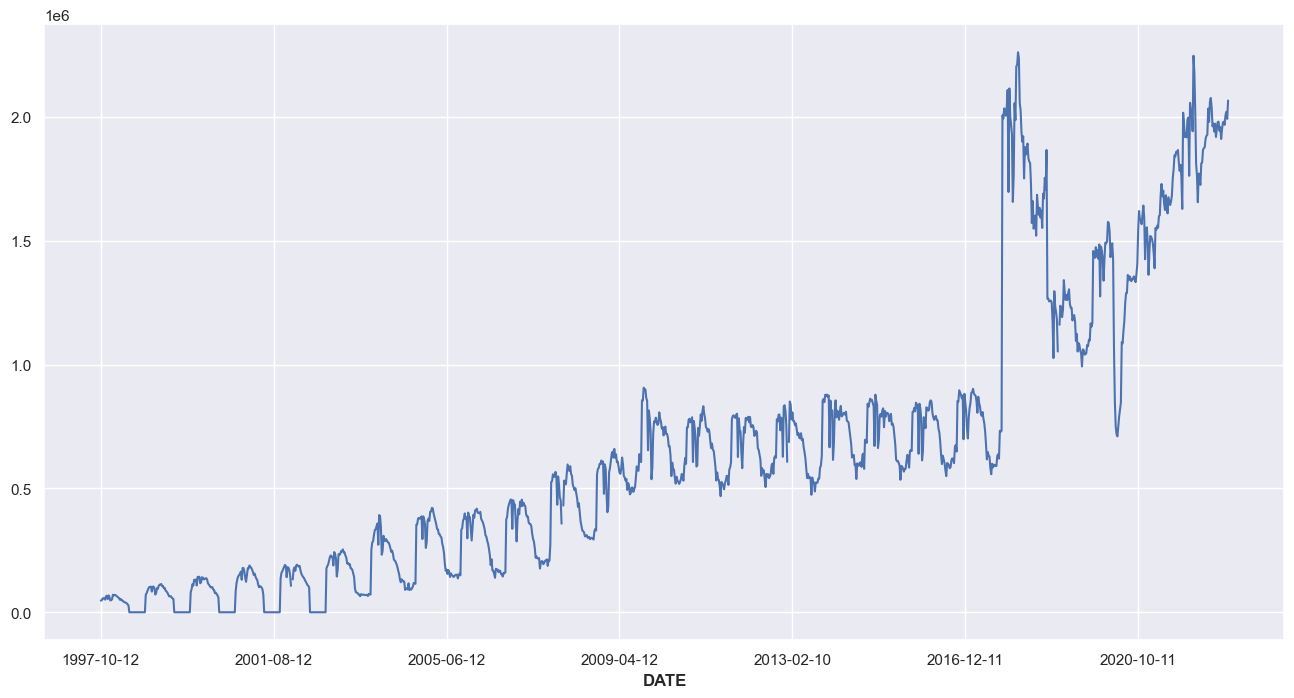

In [139]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);

<Axes: xlabel='DATE'>

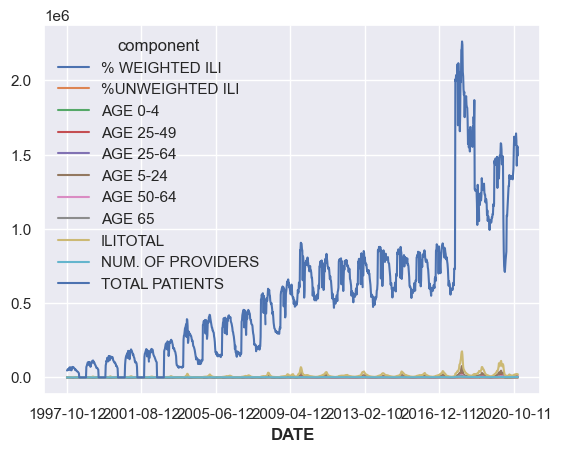

In [140]:
dataset[dataset.DATE < '2021'].set_index(time_col).plot()

<Axes: xlabel='DATE'>

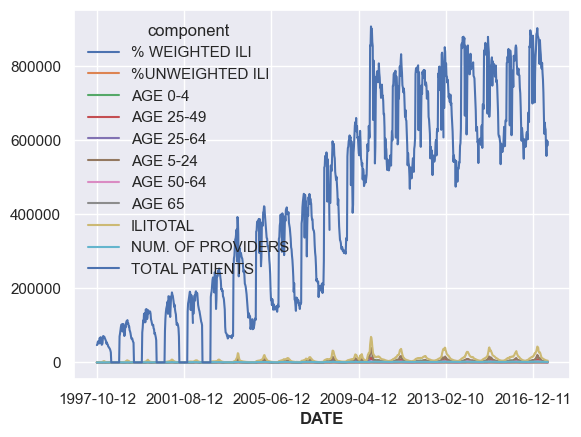

In [141]:
dataset[dataset.DATE < '2017-08'].set_index(time_col).plot()

In [142]:
# trim the anomaly part
dataset_partial = df_filled[df_filled.DATE < '2017-08']

In [143]:
dataset_partial

component       DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
0         1997-10-12        1.101480         1.216860    179.0        0.0   
1         1997-10-19        1.200070         1.280640    199.0        0.0   
2         1997-10-26        1.378760         1.239060    228.0        0.0   
3         1997-11-02        1.199200         1.144730    188.0        0.0   
4         1997-11-09        1.656180         1.261120    217.0        0.0   
...              ...             ...              ...      ...        ...   
1029      2017-07-02        0.859531         0.961603   1771.0     1121.0   
1030      2017-07-09        0.818998         0.955818   1728.0     1111.0   
1031      2017-07-16        0.752505         0.827597   1545.0     1004.0   
1032      2017-07-23        0.731146         0.811886   1549.0      908.0   
1033      2017-07-30        0.733295         0.818527   1576.0      953.0   

component  AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  \
0              157.0     205.0        0.0    29.0     570.0   
1              151.0     242.0        0.0    23.0     615.0   
2              153.0     266.0        0.0    34.0     681.0   
3              193.0     236.0        0.0    36.0     653.0   
4              162.0     280.0        0.0    41.0     700.0   
...              ...       ...        ...     ...       ...   
1029          6090.0    1748.0      489.0   467.0    5596.0   
1030          6090.0    1564.0      505.0   418.0    5326.0   
1031          6090.0    1578.0      462.0   372.0    4961.0   
1032          6090.0    1421.0      450.0   419.0    4747.0   
1033          6090.0    1515.0      459.0   376.0    4879.0   

component  NUM. OF PROVIDERS  TOTAL PATIENTS  
0                      192.0         46842.0  
1                      191.0         48023.0  
2                      219.0         54961.0  
3                      213.0         57044.0  
4                      213.0         55506.0  
...                      ...             ...  
1029                  1422.0        581945.0  
1030                  1456.0        557219.0  
1031                  1405.0        599446.0  
1032                  1384.0        584688.0  
1033                  1377.0        596071.0  

[1034 rows x 12 columns]

In [144]:
dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')

C:\Users\saira\AppData\Local\Temp\ipykernel_29232\1473158665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')


In [145]:
# dataset[target_col] = dataset[target_col].astype(float)

In [146]:
# dataset.head()

Split dataset into train and test sets

In [147]:
train_size = 0.8
train_points = int(train_size*len(dataset_partial))
train_df = dataset_partial.iloc[:train_points]
test_df = dataset_partial.iloc[train_points:]

Plot graph

In [148]:
train_df['DATE'] = train_df['DATE'].astype('str')

C:\Users\saira\AppData\Local\Temp\ipykernel_29232\1870464413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DATE'] = train_df['DATE'].astype('str')


### **Train API**

Train data: convert df to list-of-list

In [149]:
train_data = []
for value in train_df.values:
    train_data.append(list(value))

In [150]:
train_data[:2]

[['1997-10-12',
  1.10148,
  1.21686,
  179.0,
  0.0,
  157.0,
  205.0,
  0.0,
  29.0,
  570.0,
  192.0,
  46842.0],
 ['1997-10-19',
  1.20007,
  1.28064,
  199.0,
  0.0,
  151.0,
  242.0,
  0.0,
  23.0,
  615.0,
  191.0,
  48023.0]]

Custom Model Request (optional)

In [151]:
# Default model request
model_request = {
    'type': 'meta_wa',
    'scorers': ['smape', 'mase'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer'},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_naive'},
            {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'darts_autoarima'},
            # {'type': 'darts_autoets'},
        ],
    },
}

# # Onboard NeuralProphet customized model request
# np_external_model_request = {
#     'params': {
#       'changepoints_range': 0.2,
#       'epochs': 2,
#       'growth': 'off'
#     },
#     'metrics': [],
#     'type': 'neuralprophet',
# }
# # np_external_model_request = None

user_value = 0.7
output_type = 'estimate'  # 'data', 'estimate'
mauq_external_params = {
    'problem_type': 'regression',
    'confidence_level': user_value,
    'output_type': output_type

}

deepsybil_external_model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            # {'type': 'dartsimputer'},
            # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_tcn',
            #  'params': {
            #      'output_chunk_length': 52,
            #      'input_chunk_length': 104,                 
            #      'n_epochs': 20,
            # }},
            # {'type': 'darts_rnn',
            #  'params': {
            #      'model': 'LSTM',
            #      'hidden_dim': 10,
            #      'n_rnn_layers': 3
            # }},
            # {'type': 'darts_nlinear'},
            # {'type': 'darts_dlinear'},
            # {'type': 'darts_blockrnn'},
            {'type': 'darts_tsmixer',
             'params': {
                 'output_chunk_length': 52,
                 'input_chunk_length': 104,                 
                 'n_epochs': 20,
            }},
            #  {'type': 'darts_tide'}
        ],
    },
}


# # Customized model request
model_request = {
    'type': 'meta_wa',  # 'meta_naive', 'meta_wa'
    'scorers': ['mase', 'smape'],
    'params': {
        'preprocessors': [
            {'type': 'dartsimputer'},
            {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_naive'},
            # {'type': 'darts_seasonalnaive'},
            # {'type': 'darts_autotheta'},
            # {'type': 'stats_autotheta'},
            # {'type': 'darts_autoets'},
            # {'type': 'stats_autoets'},
            # {'type': 'darts_autoarima'},
            # {'type': 'stats_autoarima'},
            # {'type': 'darts_autoces'},
            # {'type': 'darts_kalman'},
            # {'type': 'darts_catboost'},            
            # # {'type': 'darts_tbats'},
            # # {'type': 'darts_linearregression'},
            # {'type': 'darts_lightgbm',
            #  'params': {
            #      'lags': 12,
            #      'output_chunk_length': 6,
            #      'verbose': -1
            # }}
            # {'type': 'neuralprophet',
            #  'external_params': np_external_model_request
            # }  # Onboard NeuralProphet external service
            {'type': 'deepsybil',
             'external_params': deepsybil_external_model_request
            }  # Onboard NeuralProphet external service
        ],
        
    },
    'mauq_params':mauq_external_params,
}

This is for JSON model_request

In [152]:
# file_path = 'model_request.json'
# # For writing the model request to a json file
# with open(file_path, 'r') as file:
#     model_request = json.load(file)

This is for YAML model_request

In [153]:
# file_path = 'model_request.yaml'
# # For reading the model request from a yaml file
# with open(file_path, 'r') as file:
#     model_request = yaml.safe_load(file)

Train API JSON Payload

In [154]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [155]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [156]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [157]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [158]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 5min 4s


In [159]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCAV7KwAAABAAWLMqAEV7GwAlewsAHAAAAAV7CwBKMXNYdHZ3U1MwS3JYQlE0V2pGUXZ2NVd2cnRNVldCcnlVYTZPU3hKWkh2UHkyUDY2d3o1NnJ5anUwdjVGMHV1bXJQeXN5Smgxd3FpMldDV3NSMjR0eWt2NEM0d0dVdjVHVVBxRlB3VVdEYTVGcEQzMjIwaldUcUlMTUl3MVFwWGxMb2hsMGhOVzJ4bVJZNnRGalNad1RONlVTckNGMEx5WHJ4SW96bXl5bE4xR29QUlFTRlg0UW9Pd3h6NFluYUp5ejR5TnZSWUlGRGlpWEJsQjJyVENobUN1NnRHcFB3cHhqeG55REx4R0d5bFoxdVZ3b2xtQnk2NnB3NFd3bFlMUjZNTHg1MHlTcER4MW1RQ1lFSk9WeE5DRVdGS2gwcVl5VDRMaEJUeHpPd1lCWWtvbjU0bXBtelNLS296eXEwM2kwb3hycktKMkJRSjJ2WjQzSHZ5NTBUMlZ2aFI0eGxydklRMEp1M1d5eTBTMXZuMkl5c1R6bVdDSjF0RzFXa0hVb3p6NXczdlc0WjNEa3dhM3dpUURobEl3NXV5V3BINDVsbDNreDJzeTRrVjVzM093c252eE1OaHh0aVJ1MVZsMno0djJqU1RvNFU1NHBFVDFPNTM1c1NqVHZuV2xvdXo0bTY2b0N5TzF0dkJzakNwaHJ3dDBQc3d2MGw0bjFYandoVUZPSjBxa1hTSG1hRHAxUkZQRU96clJPQnlsc0V5dzNqTk9YSEJ5RUlETUNFb3dSQjJyd3owVTR6RkJHQ3BURnIwQkcwUTJDMDBKeERSRXo0NVhGV3oyaGwwWGpCRU93NFUxMlAxQmtNNHZ4Q1Zrd3p2U0Jaa2p5NEd3c3JYSnZFd3JGNDIwcjJOam9UajA0RXBDM0JuVzZNcEdCaWFOQ0NHT05ycWkwcjAxV3lwNEJFakxKbkpPQmFRelJKclN3QnN6a

### **Forecast API**

Forecast Dates: predict the next 32 years of temperature anomaly data (1980-2012)

In [160]:
test_data = []
for value in test_df.drop(columns=target_col).values:
    test_data.append(list(value))

In [161]:
test_data[:2]

[['2013-08-18',
  0.755639,
  0.779136,
  1367.0,
  870.0,
  6090.0,
  1338.0,
  302.0,
  198.0,
  4075.0,
  1299.0],
 ['2013-08-25',
  0.761847,
  0.797653,
  1364.0,
  919.0,
  6090.0,
  1366.0,
  331.0,
  188.0,
  4168.0,
  1276.0]]

Model from Train API

In [162]:
model = train_json_out['model']
estimate=train_json_out['estimate']

Forecast API JSON Payload

In [163]:
api_json = {
    'model': model,
    'data': test_data,
    'estimate':estimate
}

Build URL (same as train except for the endpoint)

In [164]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [165]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 3.29 s


In [166]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['2013-08-18',
   582222.0270073757,
   456290.1987380324,
   708153.855276719],
  ['2013-08-25', 545718.0917534616, 419786.26348411833, 671649.9200228049],
  ['2013-09-01', 545889.0773939341, 419957.24912459083, 671820.9056632774],
  ['2013-09-08', 558594.2658449082, 432662.4375755649, 684526.0941142514],
  ['2013-09-15', 593979.7948984677, 468047.9666291244, 719911.623167811],
  ['2013-09-22', 615416.3000498266, 489484.4717804833, 741348.1283191699],
  ['2013-09-29', 694246.3369642235, 568314.5086948803, 820178.1652335668],
  ['2013-10-06', 702811.6997769081, 576879.8715075649, 828743.5280462514],
  ['2013-10-13', 805952.9554733199, 680021.1272039766, 931884.7837426631],
  ['2013-10-20', 807520.9549302325, 681589.1266608892, 933452.7831995757],
  ['2013-10-27', 830750.4998594798, 704818.6715901366, 956682.3281288231],
  ['2013-11-03', 820165.2485482187, 694233.4202788755, 946097.076817562],
  ['2013-11-10', 828885.1647043383, 702953.336434995, 954816.9929736815],
  ['2013-1

Combine forecast dates and output

In [167]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col,"lower_interval","upper_interval"],
)

In [168]:
forecast_df.shape

(207, 4)

In [169]:
forecast_df.columns

Index(['DATE', 'TOTAL PATIENTS', 'lower_interval', 'upper_interval'], dtype='object')

In [170]:
forecast_df.head()

DATE  TOTAL PATIENTS  lower_interval  upper_interval
0  2013-08-18   582222.027007   456290.198738   708153.855277
1  2013-08-25   545718.091753   419786.263484   671649.920023
2  2013-09-01   545889.077394   419957.249125   671820.905663
3  2013-09-08   558594.265845   432662.437576   684526.094114
4  2013-09-15   593979.794898   468047.966629   719911.623168

In [171]:
forecast_df.tail()

DATE  TOTAL PATIENTS  lower_interval  upper_interval
202  2017-07-02   587403.325702   461471.497433   713335.153972
203  2017-07-09   588461.952908   462530.124638   714393.781177
204  2017-07-16   591623.516755   465691.688485   717555.345024
205  2017-07-23   587205.620138   461273.791869   713137.448408
206  2017-07-30   581897.834961   455966.006691   707829.663230

Plot train and forecast side-by-side

C:\Users\saira\AppData\Local\Temp\ipykernel_29232\2998340865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['color'] = 'b'


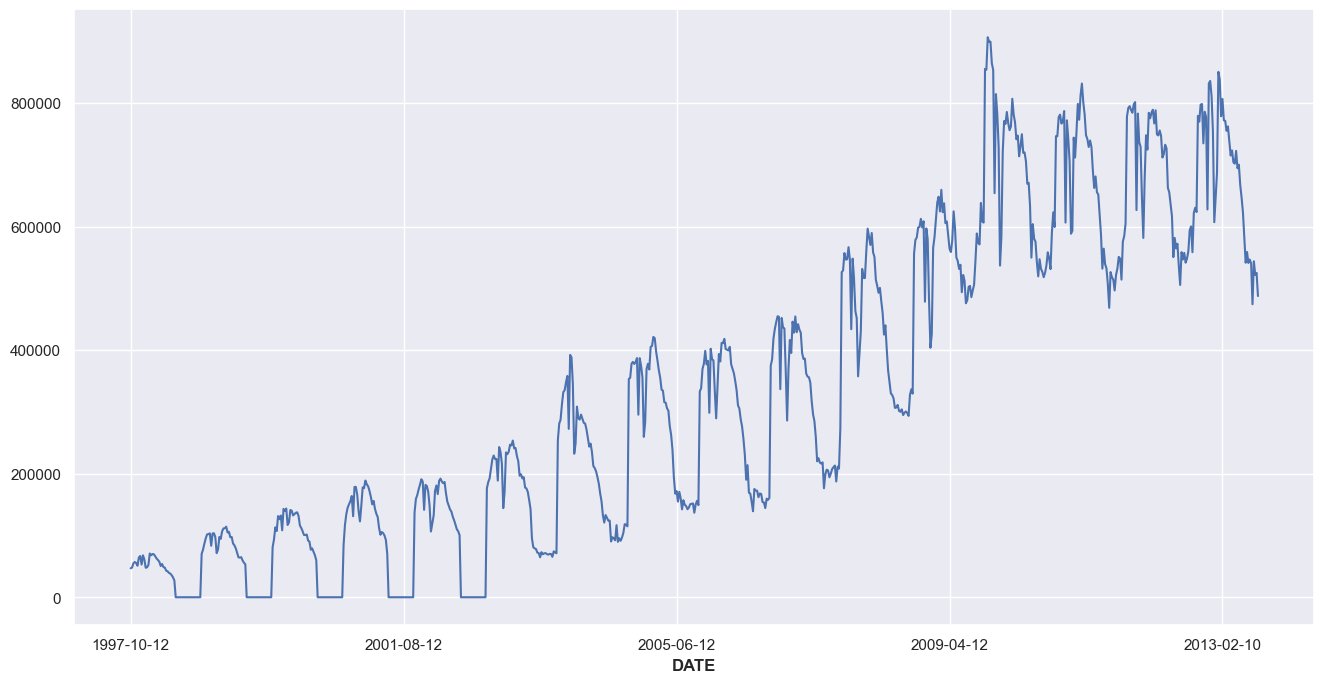

In [172]:
train_df['color'] = 'b'
train_df.set_index(time_col)[target_col].plot(figsize=figsize, color=train_df['color']);

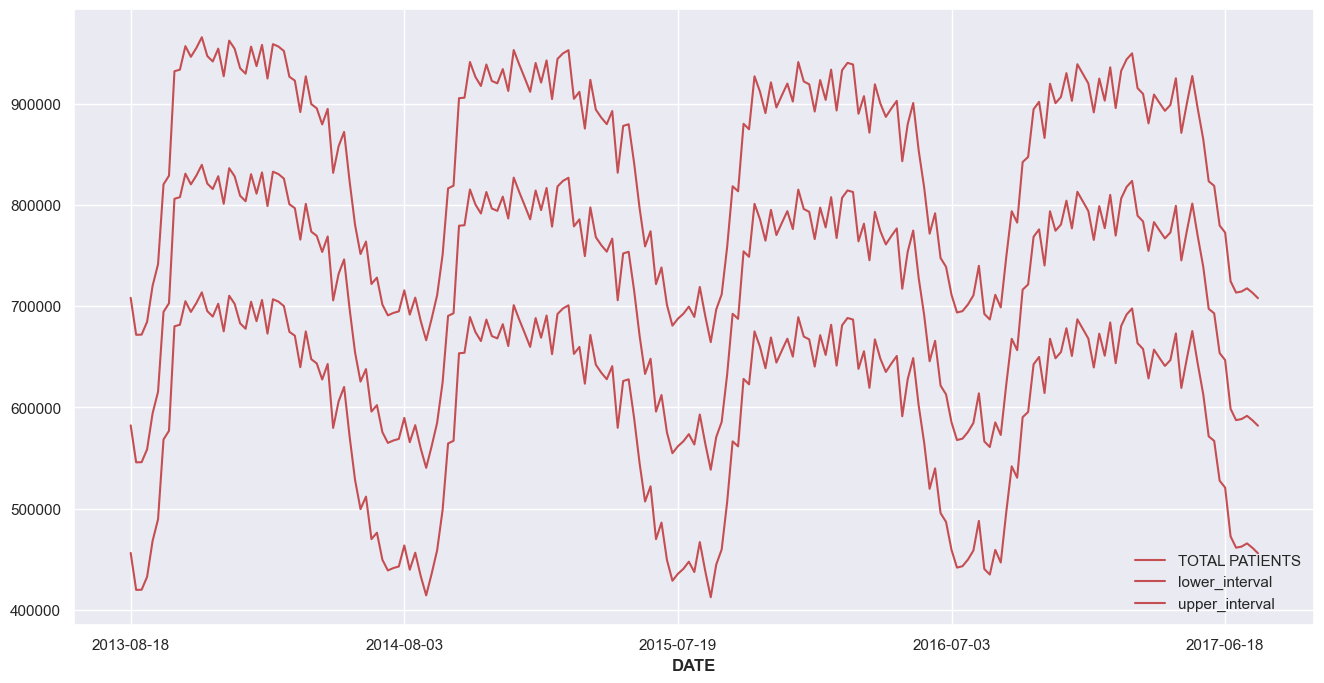

In [173]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [174]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [175]:
df.shape

(1034, 15)

In [176]:
df.head()

DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  AGE 25-64  \
0  1997-10-12         1.10148          1.21686    179.0        0.0      157.0   
1  1997-10-19         1.20007          1.28064    199.0        0.0      151.0   
2  1997-10-26         1.37876          1.23906    228.0        0.0      153.0   
3  1997-11-02         1.19920          1.14473    188.0        0.0      193.0   
4  1997-11-09         1.65618          1.26112    217.0        0.0      162.0   

   AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  NUM. OF PROVIDERS  TOTAL PATIENTS  \
0     205.0        0.0    29.0     570.0              192.0         46842.0   
1     242.0        0.0    23.0     615.0              191.0         48023.0   
2     266.0        0.0    34.0     681.0              219.0         54961.0   
3     236.0        0.0    36.0     653.0              213.0         57044.0   
4     280.0        0.0    41.0     700.0              213.0         55506.0   

  color  lower_interval  upper_interval  
0     b             NaN             NaN  
1     b             NaN             NaN  
2     b             NaN             NaN  
3     b             NaN             NaN  
4     b             NaN             NaN

In [177]:
df.tail()

DATE  % WEIGHTED ILI  %UNWEIGHTED ILI  AGE 0-4  AGE 25-49  \
1029  2017-07-02             NaN              NaN      NaN        NaN   
1030  2017-07-09             NaN              NaN      NaN        NaN   
1031  2017-07-16             NaN              NaN      NaN        NaN   
1032  2017-07-23             NaN              NaN      NaN        NaN   
1033  2017-07-30             NaN              NaN      NaN        NaN   

      AGE 25-64  AGE 5-24  AGE 50-64  AGE 65  ILITOTAL  NUM. OF PROVIDERS  \
1029        NaN       NaN        NaN     NaN       NaN                NaN   
1030        NaN       NaN        NaN     NaN       NaN                NaN   
1031        NaN       NaN        NaN     NaN       NaN                NaN   
1032        NaN       NaN        NaN     NaN       NaN                NaN   
1033        NaN       NaN        NaN     NaN       NaN                NaN   

      TOTAL PATIENTS color  lower_interval  upper_interval  
1029   587403.325702     r   461471.497433   713335.153972  
1030   588461.952908     r   462530.124638   714393.781177  
1031   591623.516755     r   465691.688485   717555.345024  
1032   587205.620138     r   461273.791869   713137.448408  
1033   581897.834961     r   455966.006691   707829.663230

Plot combined train and forecast sets with the vertical black line as the cut-off

Plot original dataset to compare

Plot original dataset (blue) with SYBIL forecasted values (red)

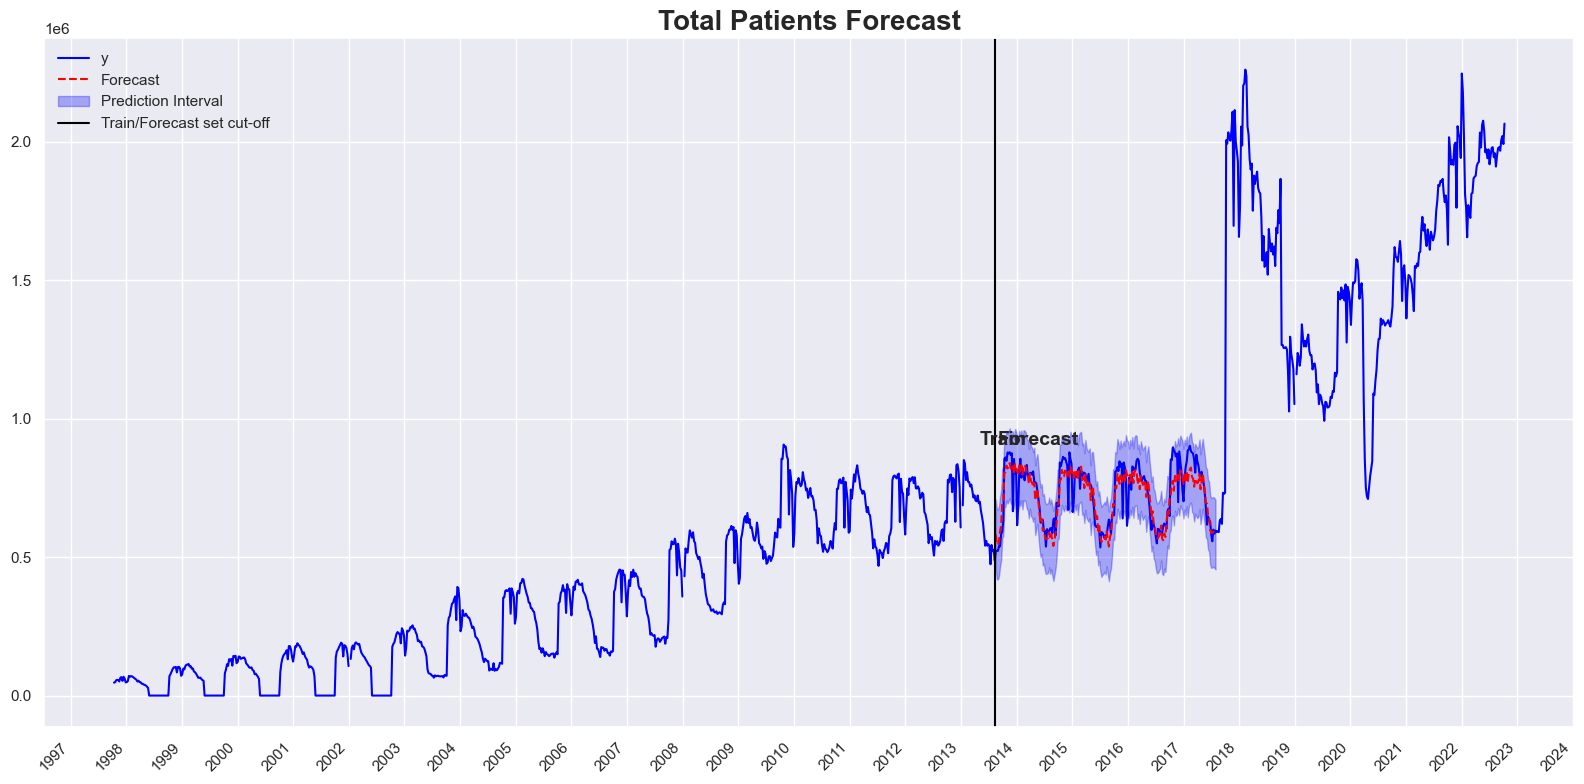

In [178]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd  # Import pandas if you haven't already

# Ensure time_col is datetime
df[time_col] = pd.to_datetime(df[time_col])
forecast_df[time_col] = pd.to_datetime(forecast_df[time_col])

plt.figure(figsize=figsize)

dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%Y-%m') # Corrected line

plt.plot(dataset[time_col], dataset[target_col], color='blue', label='y')
# plt.plot(df[time_col], df[target_col], color='blue', label='y')

plt.plot(forecast_df[time_col], forecast_df[target_col], color='red', linestyle='dashed', label='Forecast')

plt.fill_between(forecast_df[time_col], forecast_df['lower_interval'], forecast_df['upper_interval'],
                 color='blue', alpha=0.3, label='Prediction Interval')

plt.axvline(x=df[time_col].iloc[len(train_df)-1], color='black', label='Train/Forecast set cut-off')

plt.text(df[time_col].iloc[len(train_df)-15], df[target_col].max(), 'Train', fontweight='bold', fontsize=14)
plt.text(df[time_col].iloc[len(train_df)+2], df[target_col].max(), 'Forecast', fontweight='bold', fontsize=14)

# Format x-axis to show years clearly
ax = plt.gca()

# Display a tick every year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adjust label rotation and alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.title('Total Patients Forecast', fontweight='bold', fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()
